In [153]:
import src
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from warnings import filterwarnings
# Pandas will give a lot of warning while I am mutating data frames in functions.
filterwarnings('ignore')
# Matplot lib inline
plt.style.use('seaborn')
%matplotlib inline

In [154]:
# import the cleaned data as described in /datacleaning/genrecleaning.ipynb
df1  = pd.read_csv('rawdata/genres-budget.csv')
df_titles = pd.read_csv('rawdata/title.csv')

In [155]:
df1.head()

,tconst,genres,numvotes,averagerating,start_year,runtime_minutes,Adult,Sport,Sci-Fi,Fantasy,...,Comedy,Action,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,roi
0,tt0249516,"Action,Animation,Comedy",8248,1.9,2012,91.0,False,False,False,False,...,True,True,2012-12-31,foodfight!,45000000.0,$0,73706.0,2012,12,-99.836209
1,tt0337692,"Adventure,Drama,Romance",37886,6.1,2012,124.0,False,False,False,False,...,False,False,2013-03-22,on the road,25000000.0,"$720,828",9313302.0,2013,3,-62.746792
2,tt4339118,Drama,6,6.0,2014,89.0,False,False,False,False,...,False,False,2013-03-22,on the road,25000000.0,"$720,828",9313302.0,2013,3,-62.746792
3,tt5647250,Drama,127,5.7,2016,121.0,False,False,False,False,...,False,False,2013-03-22,on the road,25000000.0,"$720,828",9313302.0,2013,3,-62.746792
4,tt0359950,"Adventure,Comedy,Drama",275300,7.3,2013,114.0,False,False,False,False,...,True,False,2013-12-25,the secret life of walter mitty,91000000.0,"$58,236,838",187861183.0,2013,12,106.440860


### Explanation of the table
We wrangled this data from data sets scraped from imdb and  includes a truth matrix for all the genres to allow simple indexing as well as metadata pertaining the movies overall success.

We removed all observations with missing values for genre, worldwide_gross and production_budget as these values are critical to our hyptotheses. In addition, no observations from before 2010 and after 2019 were included in the data set. This was to insure the relevance of the data to the business question at hand.

### Genre Analysis
Our first hypothesis was that genre played a large role in the ratings and success of a movie. To test this we created a custom function to examine the average return on investment (roi) and total international gross revenue.

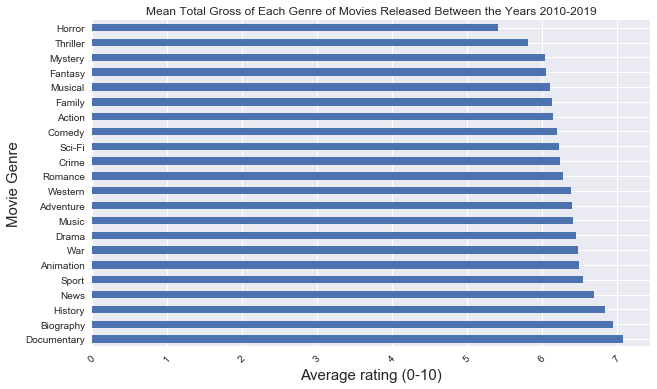

In [156]:
# src function and documentation available in src.py
df1.genres = src.coerce_to_list(df1, 'genres')
df_to_plot = src.genre_pandas_mean(df1, 'averagerating')
df_to_plot.plot(kind='barh', legend=False,figsize=(10,6))
plt.xticks(rotation = 45)
plt.title('Mean Total Gross of Each Genre of Movies Released Between the Years 2010-2019')
plt.xlabel('Average rating (0-10)', size = 15)
plt.ylabel('Movie Genre', size = 15);
plt.savefig('roi_genre.png')

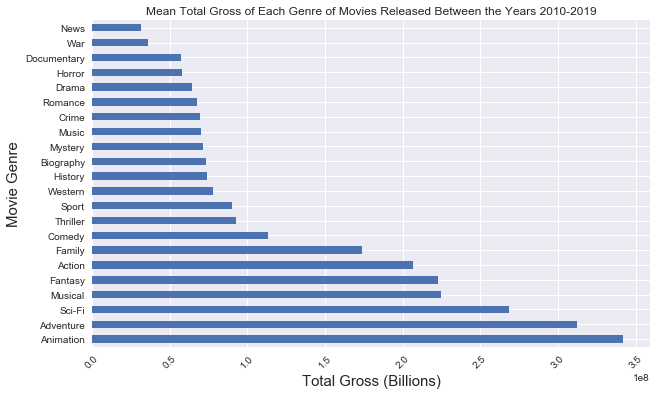

In [157]:
df_to_plot = src.genre_pandas_mean(df1, 'worldwide_gross')
df_to_plot.plot(kind='barh', legend=False,figsize=(10,6))
plt.xticks(rotation = 45)
plt.title('Mean Total Gross of Each Genre of Movies Released Between the Years 2010-2019')
plt.xlabel('Total Gross (Billions)', size = 15)
plt.ylabel('Movie Genre', size = 15);
plt.savefig('roi_genre.png')

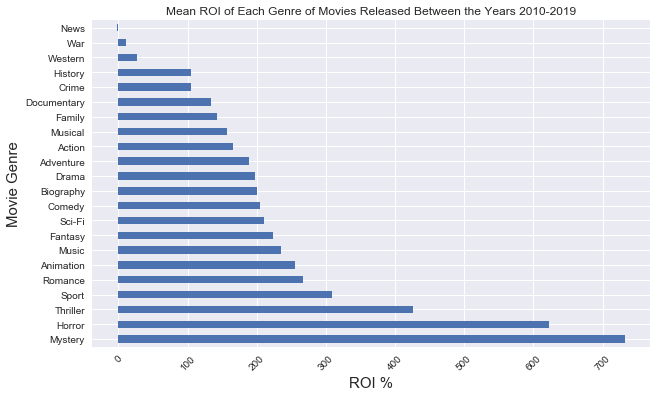

In [158]:
# See src.genre_pandas_mean in src documentation
df_to_plot = src.genre_pandas_mean(df1, 'roi')
df_to_plot.plot(kind='barh', legend=False,figsize=(10,6))
plt.xticks(rotation = 45)
plt.title('Mean ROI of Each Genre of Movies Released Between the Years 2010-2019')
plt.xlabel('ROI %', size = 15)
plt.ylabel('Movie Genre', size = 15);
plt.savefig('roi_genre.png')

From the preliminary Anlysis, it seems like though animated movies as a whole do really well, when it comes to return on investment, there is none better than mystery, horros and thrillers.

This begs the question, is there some magical combination of genres that leads to high return on investment?

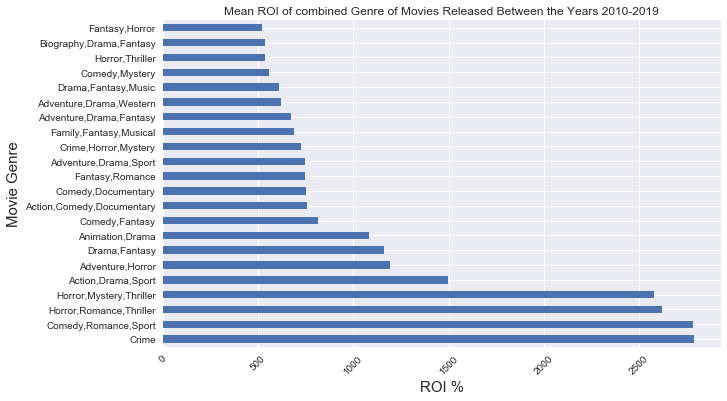

In [159]:
# Reload the database to reset the genre column from list back to string
df1 = pd.read_csv('rawdata/genres-budget.csv')

# Group the values by genre (combinations present this time) and check ROI for the top 22 genres
grouped = df1.groupby(['genres']).roi.mean().sort_values(ascending=False)[:22]

# Create chart based on the data
# See src.genre_pandas_mean in src documentation
grouped.plot(kind='barh', legend=False,figsize=(10,6))
plt.xticks(rotation = 45)
plt.title('Mean ROI of combined Genre of Movies Released Between the Years 2010-2019')
plt.xlabel('ROI %', size = 15)
plt.ylabel('Movie Genre', size = 15);
plt.savefig('roi_genre.png')

#### So as it happens, crime does pay!

Or atleast people are willing to spend a signeficant amount of money to watch it. 

What is the highest ROI crime movie of all time?

In [143]:
highest_crime = df1.sort_values('roi', ascending = False)[df1.Crime == True].iloc[0,:1].values[0]
df_titles[df_titles.tconst == highest_crime]

,primary_title,tconst
1734,split,tt3604256


More of a mystery/crime/thriller if you ask us but interesting none the less. 

The trend is that horror movies, thrillers and crime movies generate a great return on investment. But, does is matter how much money you invest initially? It there a point of dimninishing returns for your investment?